<a href="https://colab.research.google.com/github/BANKUTHANMAI/LGMDS-Stock-Market-prediction/blob/main/LGMDS_stockprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
dataframe=pd.read_csv("/content/stock.txt")

In [3]:
dataframe.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [4]:
dataframe.head

<bound method NDFrame.head of             Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                  

In [5]:
dataframe.tail

<bound method NDFrame.tail of             Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                  

In [6]:
dataframe.shape

(2035, 8)

In [7]:
duplicate = dataframe[dataframe.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [Date, Open, High, Low, Last, Close, Total Trade Quantity, Turnover (Lacs)]
Index: []


In [8]:
(dataframe.isna().sum())

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

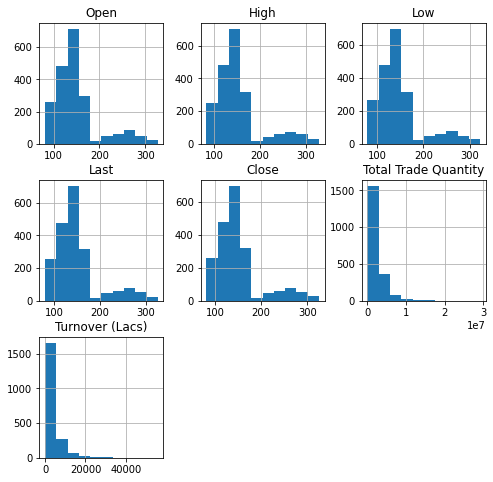

In [9]:
dataframe.hist(figsize=(8,8))
plt.show()

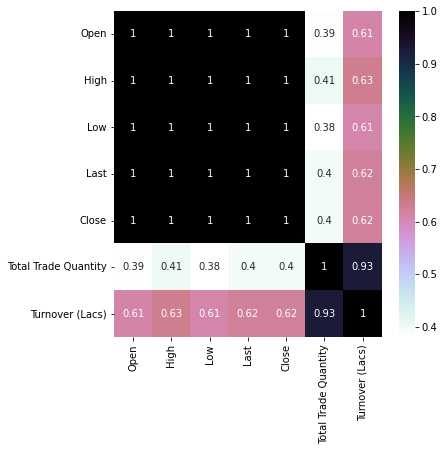

In [10]:
plt.figure(figsize=(6,6))
sns.heatmap(dataframe.corr(), annot=True, cmap='cubehelix_r')
plt.show()

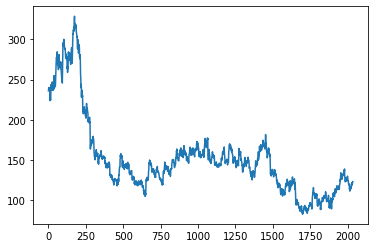

In [11]:
dataframe_high=dataframe.reset_index()['High']
plt.plot(dataframe_high)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
dataframe_high = scaler.fit_transform(np.array(dataframe_high).reshape(-1,1))

In [13]:
training_size = int(len(dataframe_high) * 0.75)
test_size = len(dataframe_high) - training_size
train_data,test_data = dataframe_high[0:training_size,:], dataframe_high[training_size:len(dataframe_high),:1]

In [14]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [16]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [17]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [18]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [19]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 150, batch_size = 64, verbose = 1)

Epoch 1/150
23/23 [==============================] - 15s 341ms/step - loss: 0.0222 - val_loss: 0.0085
Epoch 2/150
23/23 [==============================] - 7s 284ms/step - loss: 0.0021 - val_loss: 8.6718e-04
Epoch 3/150
23/23 [==============================] - 7s 318ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 4/150
23/23 [==============================] - 7s 284ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 5/150
23/23 [==============================] - 7s 315ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/150
23/23 [==============================] - 7s 316ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 7/150
23/23 [==============================] - 6s 283ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 8/150
23/23 [==============================] - 7s 319ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 9/150
23/23 [==============================] - 6s 282ms/step - loss: 0.0010 - val_loss: 8.6530e-04
Epoch 10/150
23/23 [==============================] - 7s 315ms/step - loss: 0.0010

In [20]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [21]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

167.36645441961542

In [22]:
math.sqrt(mean_squared_error(y_test, test_predict))

107.76259376005206

In [23]:
look_back = 100
trainPredictPlot = np.empty_like(dataframe_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
testPredictPlot = np.empty_like(dataframe_high)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(dataframe_high) - 1, :] = test_predict

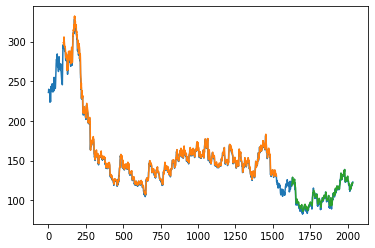

In [24]:
plt.plot(scaler.inverse_transform(dataframe_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()



In [25]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [26]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output=[]
n_steps=100
nextNumberOfDays = 28
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    
print(lst_output)

[0.16484077]
101
1 day input [0.13254727 0.13397032 0.13356373 0.13498679 0.14108559 0.13498679
 0.12644847 0.12685505 0.12482212 0.14515145 0.1467778  0.15003049
 0.15368977 0.17198618 0.16548079 0.17625534 0.17564546 0.19129904
 0.20817239 0.20309006 0.18479366 0.17930474 0.1896727  0.17483228
 0.17849156 0.17645863 0.18540354 0.18377719 0.19190892 0.18987599
 0.19028258 0.19394186 0.20004066 0.19638138 0.19495832 0.20349665
 0.19597479 0.21162838 0.22036999 0.20979874 0.21528766 0.21589754
 0.21610083 0.22748526 0.19150234 0.1833706  0.17340923 0.16751372
 0.1622281  0.17056312 0.17462899 0.17930474 0.18174426 0.16853019
 0.16548079 0.1742224  0.1713763  0.17300264 0.17157959 0.17767839
 0.18459036 0.18702988 0.18987599 0.19109575 0.18581012 0.17015654
 0.16751372 0.16974995 0.16609067 0.15531612 0.15003049 0.15064037
 0.14860744 0.14596463 0.15043708 0.14413499 0.12441553 0.12827811
 0.11547062 0.12034966 0.13478349 0.13498679 0.12868469 0.13295385
 0.12807481 0.12624517 0.13051433

In [27]:
day_new = np.arange(1,101)
day_pred = np.arange(101,129)

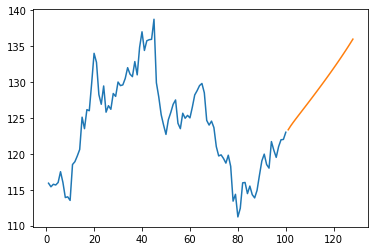

In [28]:
plt.plot(day_new, scaler.inverse_transform(dataframe_high[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

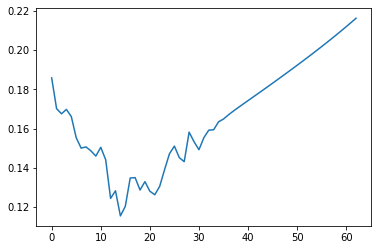

In [29]:
data_new = dataframe_high.tolist()
data_new.extend(lst_output)
plt.plot(data_new[2000:])

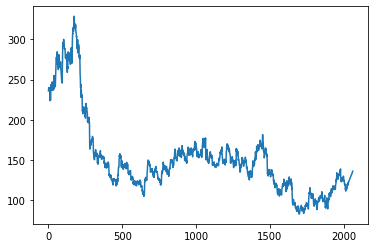

In [30]:
data_new =scaler.inverse_transform(data_new).tolist()
plt.plot(data_new)